<a href="https://colab.research.google.com/github/fernandoantonio36/Fast-Cesar-School/blob/main/Atividade_com_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors - Atividade 03

Bem-vindo ao Projeto de KNN! Este será um projeto simples e muito parecido com o notebook, com a diferença de que você receberá outro conjunto de dados. Vá em frente e siga as instruções abaixo.
## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Obtenha os dados
** Leia o arquivo csv 'KNN_Project_Data' em um DataFrame **

In [ ]:
df = pd.read_csv('/content/KNN_Project_Data')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


** Verifique o cabeçalho do DataFrame.**

In [ ]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Divisão treino-teste

** Use o método train_test_split para dividir seus dados em um conjunto treino e teste.**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop('TARGET CLASS',axis=1)
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# Padronize as variáveis

Hora de para padronizar as variáveis.

** Import StandardScaler do Scikit-learn. **

In [ ]:
df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler  



** Crie um objeto StandardScaler() chamado scaler. **

In [ ]:
scaler = StandardScaler()  




** Use o método fit() do objeto para treinar o modelo. **

In [ ]:
scaler.fit(X_train[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']])

StandardScaler()

** Use o método .transform () para transformar os parâmetros em uma versão padronizada. **

In [ ]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']] = scaler.transform(X_train[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']])  
X_test_scaled[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']] = scaler.transform(X_test[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']])

** Converta os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou. **

In [ ]:
X_train_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
541,-1.594010,0.584541,-0.680589,0.885079,-0.331101,0.287269,-1.326559,0.583467,0.352073,1.651636
440,-1.478875,0.111455,-1.487069,0.478673,0.632534,-0.067932,1.287428,0.768341,1.248123,-0.786333
482,0.018348,1.832448,-0.340968,0.687772,1.152013,-0.923793,-0.521554,0.272773,0.089718,-2.203299
422,0.534513,0.331759,0.633546,0.190957,1.626781,0.501702,-0.078628,1.048279,-1.532975,-1.883207
778,-0.737274,-0.244397,0.577852,1.081180,0.667223,1.370688,-0.757630,0.664345,-0.087544,-1.752222


,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Usando o KNN

** Importe o KNeighborClassifier do scikit learn. **

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

** Crie uma instância do modelo KNN com n_neighbors = 1 **

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

** Ajuste este modelo KNN aos dados de treinamento. **

In [ ]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Escolhendo o valor K
Vamos continuar usando o método do cotovelo para escolher um bom valor K!

** Crie um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista. Consulte o notebook se você estiver confuso nesta etapa. **

In [ ]:
import numpy as np

score = []

for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  score.append(knn.score(X_test_scaled, y_test))
  

** Agora crie o seguinte gráfico usando as informações do seu loop. **

Text(0, 0.5, 'Score')

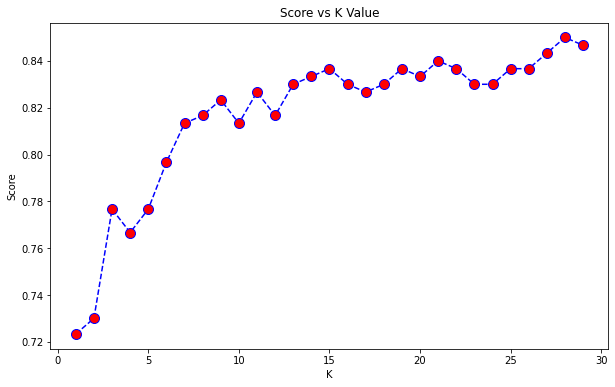

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score vs K Value')
plt.xlabel('K')
plt.ylabel('Score')

Error Rate

Text(0, 0.5, 'Error rate')

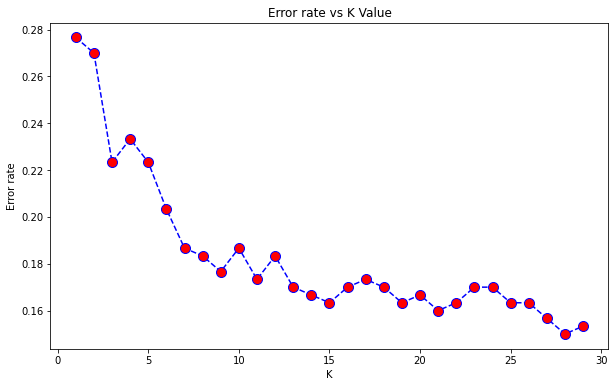

In [ ]:
import numpy as np

error = []

for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  error.append(1 - knn.score(X_test_scaled, y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)  
plt.title('Error rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error rate')

Text(0, 0.5, 'Error Rate')

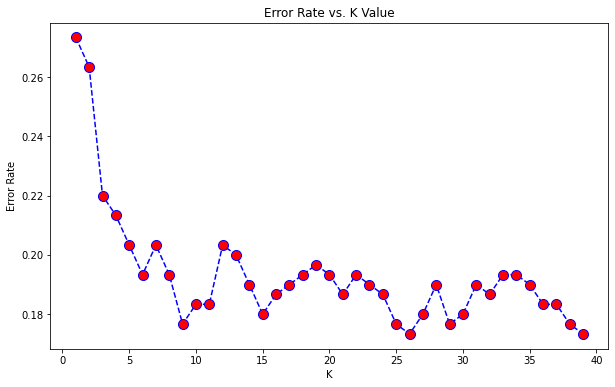

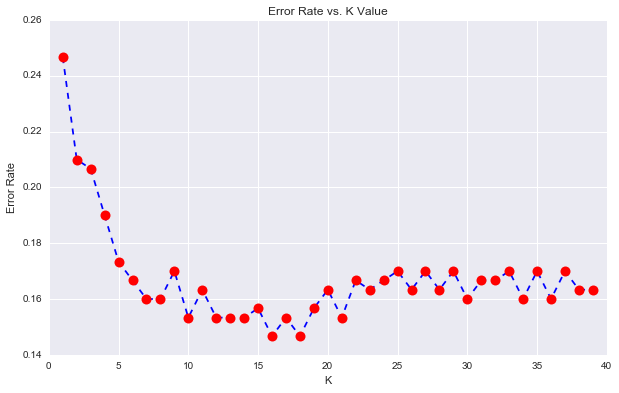

## Treine seu modelo novamente com novo valor K

** Treine novamente seu modelo com o melhor valor K (até você para decidir o que deseja) e re-faça o relatório de classificação e a matriz de confusão. **

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.8233333333333334

WITH K=9


[[120  27]
 [ 26 127]]


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       147
           1       0.82      0.83      0.83       153

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [ ]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.8366666666666667

WITH K=26


[[121  26]
 [ 26 127]]


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       147
           1       0.83      0.83      0.83       153

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



**matriz de confusão.**

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
y_test_pred = knn.predict(X_test_scaled)
confusion_matrix(y_test, y_test_pred)

array([[127,  19],
       [ 30, 124]])

relatório de classificação

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
df['TARGET CLASS'].unique()

array([0, 1])

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       146
           1       0.87      0.81      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

